# Import relevant libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
import statsmodels.api as sm
import os
os.chdir('C:\\Users\\HOME10\\Desktop\\MACHINE LEARNING\\PROJECT')
import warnings  
warnings.filterwarnings('ignore')

Read data

In [4]:
df1 = pd.read_csv('TSLA.csv')

In [5]:
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [27]:
df1.shape

(2416, 7)

# Data Exploration

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
Date         2416 non-null object
Open         2416 non-null float64
High         2416 non-null float64
Low          2416 non-null float64
Close        2416 non-null float64
Adj Close    2416 non-null float64
Volume       2416 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


In [29]:
#check for missing values
df1.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

The are no missing values in this dataset

In [30]:
# summary statistics
df1.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035003,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


Boxplot of Volume


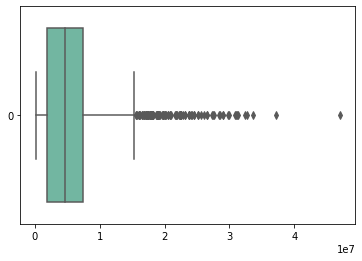

In [17]:
# Box Plot
print('Boxplot of Volume')
ax = sns.boxplot(data=df1['Volume'], orient="h", palette="Set2")

We can see from the above plot that Volume has many outliers.

More Boxplot


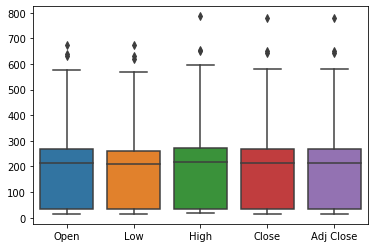

In [26]:
print('More Boxplot')
ax = sns.boxplot(data = df1[['Open', 'Low', 'High', 'Close', 'Adj Close']], orient ='v')

Similarly, the remaining float variables have outliers. Knowing this would be important in the choice of appropriate scaling method later.

For the purpose of modeling we can drop the date column

In [32]:
df = df1.drop(['Date'], axis = 1)
#confirm the drop
df.head()

,Open,High,Low,Close,Adj Close,Volume
0,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,20.000000,20.00,15.830000,16.110001,16.110001,6866900


We'd like to know how the Open, Low, High and Clsoing Prices affect the Volume of sales for a day.

[Text(0.5, 0, 'Open'),
 Text(1.5, 0, 'High'),
 Text(2.5, 0, 'Low'),
 Text(3.5, 0, 'Close'),
 Text(4.5, 0, 'Adj Close'),
 Text(5.5, 0, 'Volume')]

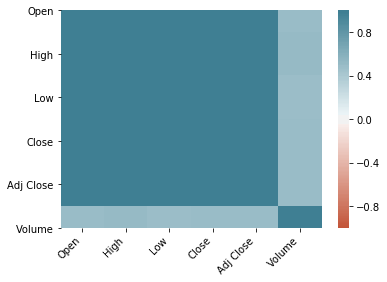

In [33]:
#Correlation heatmap
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [35]:
# Corr matrix
corr_matrix = df.corr()
corr_matrix['Volume'].sort_values(ascending=False)

Volume       1.000000
High         0.512944
Adj Close    0.505169
Close        0.505169
Open         0.501762
Low          0.493496
Name: Volume, dtype: float64

We can see that High, Adj Close, Close, Open and Low have positive correlation with Volume of sales.

# Data Preprocessing

Since we have outliers in the dataset, it would be wise to use Robustscaler that is less susceptible to the presence of outliers. It is also important to note that eventhough non-distance based methods like Linear Regression, Random Forest etc do not necessarily require scaling, scaling the features improves computation time.

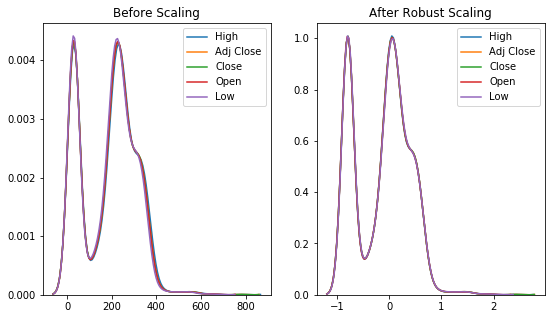

In [42]:
x = pd.DataFrame({
    'High': df.High,
    'Adj Close': df['Adj Close'],
    'Close': df.Close,
    'Open' : df.Open,
    'Low': df.Low
})
    
scaler = preprocessing.RobustScaler()
robust_scaled_df = scaler.fit_transform(x)
robust_scaled_df = pd.DataFrame(robust_scaled_df, columns=['High', 'Adj Close', 'Close', 'Open', 'Low'])


fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(9, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(x['High'], ax=ax1)
sns.kdeplot(x['Adj Close'], ax=ax1)
sns.kdeplot(x['Close'], ax=ax1)
sns.kdeplot(x['Open'], ax=ax1)
sns.kdeplot(x['Low'], ax=ax1)

ax2.set_title('After Robust Scaling')
sns.kdeplot(robust_scaled_df['High'], ax=ax2)
sns.kdeplot(robust_scaled_df['Adj Close'], ax=ax2)
sns.kdeplot(robust_scaled_df['Close'], ax=ax2)
sns.kdeplot(robust_scaled_df['Open'], ax=ax2)
sns.kdeplot(robust_scaled_df['Low'], ax=ax2)
plt.show()

# Feature Selection and Hyper-Parameter Tuning

In [50]:
robust_scaled_df.head(5)

,High,Adj Close,Close,Open,Low
0,-0.812376,-0.813642,-0.813642,-0.835970,-0.837275
1,-0.789412,-0.813900,-0.813900,-0.806717,-0.812069
2,-0.808478,-0.821947,-0.821947,-0.810120,-0.825329
3,-0.820425,-0.833825,-0.833825,-0.818737,-0.832155
4,-0.833559,-0.847122,-0.847122,-0.831662,-0.844759


In [51]:
# predictor and target split
X = robust_scaled_df
y = df['Volume']

In [52]:
# Test, Train Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0, test_size=0.3)

In [53]:
# Import the relevant packages
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

Select features and Find the best hyper-parameters for the regressors

In [54]:
# Linear Regression. We will use backward elimination technique
X1 = sm.add_constant(X_train)
ols = sm.OLS(y_train,X1)
lr = ols.fit()

selected_features = list(X.columns)
pmax = 1
while (len(selected_features)>0):
    p= []
    X_1 = X[selected_features]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = selected_features)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        selected_features.remove(feature_with_p_max)
    else:
        break  
        
print('The selected features are :', selected_features)

The selected features are : ['High', 'Adj Close', 'Close', 'Low']


We can see that out of the 5 features we started with originally, only 4 are selected

In [55]:
# let's confirm the p-values of the selected features
print(model.pvalues)

const         0.000000e+00
High         7.701312e-194
Adj Close     1.095622e-03
Close         1.095622e-03
Low          8.410042e-218
dtype: float64


In [66]:
#Let's implement the feature selection for linear regression
X_lr = robust_scaled_df.drop(['Open'], axis = 1)
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr,y,random_state=0, test_size=0.3)

In [56]:
# XGboost
tuned_parameters = [{'max_depth': [5,10, 15, 20, 25, 30],'learning_rate':[0.001, 0.01, 0.1, 0.5], 'n_estimators': [100,150,200, 250, 300]}]
MSE_xgb = ['mean_squared_error(y_test,y_pred2)']
for value in MSE_xgb:
    regr = GridSearchCV(xgb.XGBRegressor(silent = True), tuned_parameters, cv=4)
    regr.fit(X_train, y_train)
    y_true, y_pred2 = y_test, regr.predict(X_test)
    
print('The best hyper-parameters for XGBBoost are: ',regr.best_params_)

The best hyper-parameters for XGBBoost are:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


In [57]:
# AdaBoost
tuned_parameters = [{'learning_rate': [0.1,1,2,3,4,5], 'n_estimators': [100,200,300, 400, 500]}]
MSE_ada = ['mean_squared_error(y_test,y_pred3)']
for value in MSE_ada:
    adaregr = GridSearchCV(AdaBoostRegressor(), tuned_parameters, cv=4)
    adaregr.fit(X_train, y_train)
    y_true, y_pred3 = y_test, adaregr.predict(X_test)
    
print('The best hyper-parameters for AdaBoost are: ', adaregr.best_params_ )                               

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


The best hyper-parameters for AdaBoost are:  {'learning_rate': 0.1, 'n_estimators': 200}


In [58]:
# Decision Tree
tuned_parameters = [{'max_depth': [1,2,3,4,5,10, 15, 20, 25, 50, 100,200]}]
MSE_dt = ['mean_squared_error(y_test,y_pred4)']
for value in MSE_dt:
    regressor_dt = GridSearchCV(DecisionTreeRegressor(), tuned_parameters, cv=4)
    regressor_dt.fit(X_train, y_train)
    y_true, y_pred4 = y_test, regressor_dt.predict(X_test)
    
print('The optimum max_depth for Decision Tree is: ', regressor_dt.best_params_ )                        

The optimum max_depth for Decision Tree is:  {'max_depth': 4}


In [59]:
# Random Forests
tuned_parameters = [{'max_depth': [5,10, 15, 20, 50, 70], 'n_estimators': [10, 25, 50, 100,150, 200, 250]}]
MSE_rf = ['mean_squared_error(y_test, y_pred5)']
for value in MSE_rf:
    regr_rf = GridSearchCV(RandomForestRegressor(), tuned_parameters, cv=4)
    regr_rf.fit(X_train, y_train)
    y_true, y_pred5 = y_test, regr_rf.predict(X_test)
    
print('The best hyper-parameters for Random Forests are: ',regr_rf.best_params_)                             

The best hyper-parameters for Random Forests are:  {'max_depth': 70, 'n_estimators': 250}


In [61]:
# KNN
tuned_parameters = [{'n_neighbors': [1,2,3,4,5,10,15,20], 'p': [1,2]}]
MSE_knn = ['mean_squared_error(y_test,y_pred)']
for i in MSE_knn:
    model = GridSearchCV(KNeighborsRegressor(), tuned_parameters, cv=4)
    model.fit(X_train, y_train)
    y_true, y_pred6 = y_test, model.predict(X_test)
    
print('The best hyper-parameters for KNN are: ', model.best_params_)                              

The best hyper-parameters for KNN are:  {'n_neighbors': 5, 'p': 2}


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [1]:
# SVM
tuned_parameters = [{'kernel': ['linear', 'rbf', 'poly'], 'C':[1, 2, 3, 5, 6, 7, 10], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1]}]
MSE_svm = ['mean_squared_error(y_test,y_pred7)']
for value in MSE_svm:
    svr_regr = GridSearchCV(svm(), tuned_parameters, cv=4)
    svr_regr.fit(X_train, y_train)
    y_true, y_pred7 = y_test, svr_regr.predict(X_test)
    
print('The best hyper-parameters for SVR are: ', svr_regr.best_params_)

NameError: name 'GridSearchCV' is not defined

# Modeling
Build the models using the tuned hyper-parameters and selected features

In [68]:
# Linear Regression
regressor = LinearRegression()
regressor.fit(X_train_lr, y_train_lr)

# XGBoost
regr = xgb.XGBRegressor(learning_rate=0.1, max_depth=5, n_estimators=100, random_state = 0, silent = True)
regr.fit(X_train, y_train)

# AdaBoost
adaregr = AdaBoostRegressor(random_state=0, learning_rate = 0.1, n_estimators=200)
adaregr.fit(X_train, y_train)

# Decision Tree
regressor_dt = DecisionTreeRegressor(random_state=0, max_depth = 4)
regressor_dt.fit(X_train,y_train)

# Random Forests
regr_rf = RandomForestRegressor(max_depth=70, random_state=0,
                             n_estimators=250)
regr_rf.fit(X_train, y_train)

# KNN
neigh = KNeighborsRegressor(n_neighbors = 5, metric = 'minkowski', p = 2)
neigh.fit(X_train, y_train)

# SVR
svr_regr = SVR(gamma=1, kernel = 'poly', C =10)
svr_regr.fit(X_train, y_train) 

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1,
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [70]:
# Predict price using the models above
y_pred1 = regressor.predict(X_test_lr)        # Linear regression
y_pred2 = regr.predict(X_test)                # XGBoost
y_pred3 = adaregr.predict(X_test)             # AdaBoost
y_pred4 = regressor_dt.predict(X_test)        # Decision Tree
y_pred5 = regr_rf.predict(X_test)             # Random Forests
y_pred6 = neigh.predict(X_test)               # KNN
y_pred7 = svr_regr.predict(X_test)            # SVR

In [71]:
# Find R Squared (R^2) Values
print('The R^2 value for Linear Regression is        :', round((r2_score(y_test_lr,y_pred1)), 3))
print('The R^2 value for XGBoost Regressor is        :', round((r2_score(y_test,y_pred2)), 3))
print('The R^2 value for AdaBoost Regressor is       :', round((r2_score(y_test,y_pred3)), 3))
print('The R^2 value for Decision Tree Regressor is  :', round((r2_score(y_test,y_pred4)), 3))
print('The R^2 value for Random Forests Regressor is :', round((r2_score(y_test,y_pred5)), 3))
print('The R^2 value for KNN Regressor is            :', round((r2_score(y_test,y_pred6)), 3))
print('The R^2 value for SVM Regressor is            :', round((r2_score(y_test,y_pred7)), 3))

The R^2 value for Linear Regression is        : 0.596
The R^2 value for XGBoost Regressor is        : 0.524
The R^2 value for AdaBoost Regressor is       : 0.323
The R^2 value for Decision Tree Regressor is  : 0.417
The R^2 value for Random Forests Regressor is : 0.538
The R^2 value for KNN Regressor is            : 0.478
The R^2 value for SVM Regressor is            : -0.019


In [72]:
# Find adjusted R Squared (Adj R2) Values
print('The Adj R2 value for Linear Regression is        :', round((1 - (1-r2_score(y_test,y_pred1))*(len(y)-1)/(len(y)-X.shape[1]-1)),3))
print('The Adj R2 value for XGBoost Regressor is        :', round((1 - (1-r2_score(y_test,y_pred2))*(len(y)-1)/(len(y)-X.shape[1]-1)),3))
print('The Adj R2 value for AdaBoost Regressor is       :', round((1 - (1-r2_score(y_test,y_pred3))*(len(y)-1)/(len(y)-X.shape[1]-1)),3))
print('The Adj R2 value for Decision Tree Regressor is  :', round((1 - (1-r2_score(y_test,y_pred4))*(len(y)-1)/(len(y)-X.shape[1]-1)),3))
print('The Adj R2 value for Random Forests Regressor is :', round((1 - (1-r2_score(y_test,y_pred5))*(len(y)-1)/(len(y)-X.shape[1]-1)),3))
print('The Adj R2 value for KNN Regressor is            :', round((1 - (1-r2_score(y_test,y_pred6))*(len(y)-1)/(len(y)-X.shape[1]-1)),3))
print('The Adj R2 value for SVM Regressor is            :', round((1 - (1-r2_score(y_test,y_pred7))*(len(y)-1)/(len(y)-X.shape[1]-1)),3))

The Adj R2 value for Linear Regression is        : 0.596
The Adj R2 value for XGBoost Regressor is        : 0.523
The Adj R2 value for AdaBoost Regressor is       : 0.322
The Adj R2 value for Decision Tree Regressor is  : 0.416
The Adj R2 value for Random Forests Regressor is : 0.537
The Adj R2 value for KNN Regressor is            : 0.477
The Adj R2 value for SVM Regressor is            : -0.021


In [74]:
# Find Mean Squared Errors (MSE) and Root Mean Squared Errors (RMSE)
MSE_lr  = mean_squared_error(y_test_lr,y_pred1)
MSE_xgb = mean_squared_error(y_test,y_pred2)
MSE_ada = mean_squared_error(y_test,y_pred3)
MSE_dt  = mean_squared_error(y_test,y_pred4)
MSE_rf  = mean_squared_error(y_test,y_pred5)
MSE_knn = mean_squared_error(y_test,y_pred6)
MSE_svr = mean_squared_error(y_test,y_pred7)

In [75]:
print('The RMSE value for Linear Regression is        :', round(np.sqrt(MSE_lr)));
print('The RMSE value for XGBoost Regressor is        :', round(np.sqrt(MSE_xgb)));
print('The RMSE value for AdaBoost Regressor is       :', round(np.sqrt(MSE_ada)));
print('The RMSE value for Decision Tree Regressor is  :', round(np.sqrt(MSE_dt)));
print('The RMSE value for Random Forests Regressor is :', round(np.sqrt(MSE_rf)));
print('The RMSE value for KNN Regressor is            :', round(np.sqrt(MSE_knn)));
print('The RMSE value for SVM Regressor is            :', round(np.sqrt(MSE_svr)));

The RMSE value for Linear Regression is        : 3353740.0
The RMSE value for XGBoost Regressor is        : 3643687.0
The RMSE value for AdaBoost Regressor is       : 4342117.0
The RMSE value for Decision Tree Regressor is  : 4029894.0
The RMSE value for Random Forests Regressor is : 3590168.0
The RMSE value for KNN Regressor is            : 3814841.0
The RMSE value for SVM Regressor is            : 5328996.0


Text(0.5, 1.0, 'Linear Regression')

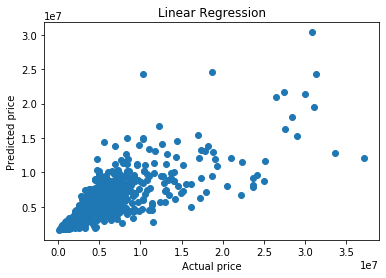

In [76]:
# Plot the actual vs predicted prices
plt.scatter(y_test_lr, y_pred1)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Linear Regression")

Text(0.5, 1.0, 'Xgboost')

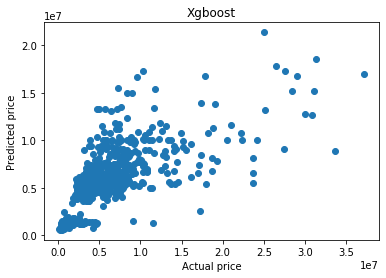

In [77]:
plt.scatter(y_test, y_pred2)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Xgboost")

Text(0.5, 1.0, 'Adaboost')

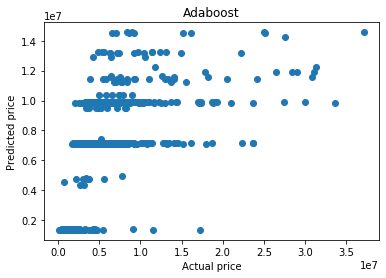

In [78]:
plt.scatter(y_test, y_pred3)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Adaboost")

Text(0.5, 1.0, 'Decision Tree')

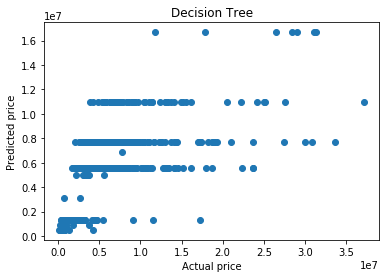

In [79]:
plt.scatter(y_test, y_pred4)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Decision Tree")

Text(0.5, 1.0, 'Random Forest')

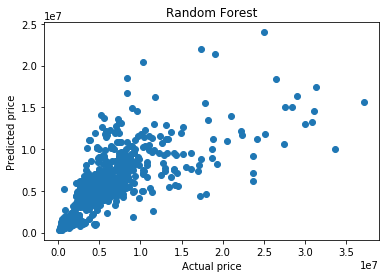

In [80]:
plt.scatter(y_test, y_pred5)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Random Forest")

Text(0.5, 1.0, 'KNN')

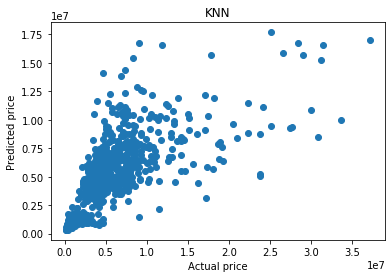

In [81]:
plt.scatter(y_test, y_pred6)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("KNN")

Text(0.5, 1.0, 'SVM')

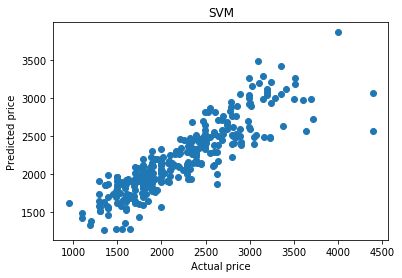

In [103]:
plt.scatter(y_test, y_pred7)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("SVM")